In [1]:
import pandas as pd
import numpy as np
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
games_df = pd.read_csv("data/games.csv")

In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16597 non-null  int64  
 1   Name          16597 non-null  object 
 2   Platform      16597 non-null  object 
 3   Year          16338 non-null  float64
 4   Genre         16597 non-null  object 
 5   Publisher     16597 non-null  object 
 6   NA_Sales      16597 non-null  float64
 7   EU_Sales      16597 non-null  float64
 8   JP_Sales      16597 non-null  float64
 9   Other_Sales   16597 non-null  float64
 10  Global_Sales  16597 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
games_df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16592  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16593  16597                     Men in Black II: Alien Escape       GC   
16594  16598  SCORE International Baja 1000: The Official Game      PS2   
16595  16599                                        Know How 2       DS   
16596  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16592  2002.0      Platform       Kemco      0.01      0.00      0.00   
16593  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16594  2008.0        Racing  Activision      0.00      0.00      0.00   
16595  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16596  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16592         0.00          0.01  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  

[16597 rows x 11 columns]

In [5]:
games_df.nunique()

Rank            16597
Name            11492
Platform           30
Year               41
Genre              12
Publisher         581
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [6]:
games_df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16597.000000  16338.000000  16597.000000  16597.000000  16597.000000   
mean    8300.149184   2006.402252      0.264683      0.146661      0.077785   
std     4791.638040      5.837302      0.816705      0.505365      0.309300   
min        1.000000   1977.000000      0.000000      0.000000      0.000000   
25%     4151.000000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.000000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16597.000000  16597.000000  
mean       0.048066      0.537472  
std        0.188594      1.555070  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [7]:
games_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            259
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
games_df.dropna(inplace=True)
games_df.drop(games_df[games_df['Year']>2016].index, inplace=True)
games_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
games_df["Platform"].replace("DS", "Nintendo DS", inplace=True)
games_df["Platform"].replace("NES", "Nintendo NES", inplace=True)
games_df["Platform"].replace("SNES", "Super Nintendo", inplace=True)
games_df["Platform"].replace("GB", "GameBoy Color", inplace=True)
games_df["Platform"].replace("3DS", "Nintendo 3DS", inplace=True)
games_df["Platform"].replace("DC", "Dreamcast", inplace=True)
games_df["Platform"].replace("GEN", "SEGA Genesis", inplace=True)
games_df["Platform"].replace("GG", "Game Gear", inplace=True)
games_df["Platform"].replace("NG", "Neo Geo", inplace=True)
games_df["Platform"].replace("SAT", "Sega Saturn", inplace=True)
games_df["Platform"].replace("SCD", "Sega CD", inplace=True)
games_df["Platform"].replace("TG16", "Turbo Grafx", inplace=True)
games_df["Platform"].replace("WS", "WanderSwan", inplace=True)
games_df["Platform"].replace("2600", "Atari", inplace=True)

games_df.drop(columns="Rank",inplace=True)

#Changing the Name to be more Clear, and remove the column that I not gonna use.

In [10]:
games_df.head()

Name       Platform    Year         Genre Publisher  \
0                Wii Sports            Wii  2006.0        Sports  Nintendo   
1         Super Mario Bros.   Nintendo NES  1985.0      Platform  Nintendo   
2            Mario Kart Wii            Wii  2008.0        Racing  Nintendo   
3         Wii Sports Resort            Wii  2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue  GameBoy Color  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [11]:
meanYear = games_df["Year"].mean()
print(meanYear)
modeYear = games_df["Year"].mode()
print(modeYear)
medianYear = games_df["Year"].median()
print(medianYear)

2006.3994734908779
0    2009.0
dtype: float64
2007.0


In [12]:
meanGlob = games_df["Global_Sales"].mean()
print(meanGlob)
modeGlob = games_df["Global_Sales"].mode()
print(modeGlob)
medianGlob = games_df["Global_Sales"].median()
print(medianGlob)

0.5417980898739431
0    0.02
dtype: float64
0.17


In [13]:
meanGlob = games_df["Global_Sales"].mean()
print(meanGlob)
modeGlob = games_df["Global_Sales"].mode()
print(modeGlob)
medianGlob = games_df["Global_Sales"].median()
print(medianGlob)


0.5417980898739431
0    0.02
dtype: float64
0.17


In [14]:
games_df['Year'].std()

5.835278628418993

In [15]:
games_df['Year'].var()

34.05047667128345

In [16]:
games_df['Global_Sales'].std()

1.5664910453602057

In [17]:
games_df['Global_Sales'].var()

2.45389419519371

In [18]:
quantileYear1 = games_df["Year"].quantile(0.25)
print(quantileYear1)
quantileYear2 = games_df["Year"].quantile(0.50)
print(quantileYear2)
quantileYear3 = games_df["Year"].quantile(0.75)
print(quantileYear3)

2003.0
2007.0
2010.0


In [19]:
quantileGlob1 = games_df["Global_Sales"].quantile(0.25)
print(quantileGlob1)
quantileGlob2 = games_df["Global_Sales"].quantile(0.50)
print(quantileGlob2)
quantileGlob3 = games_df["Global_Sales"].quantile(0.75)
print(quantileGlob3)

0.06
0.17
0.48


In [20]:
quantileYear1, quantileYear3 = np.percentile(games_df['Year'], [75 ,25])
iqr = quantileYear1 - quantileYear3
iqr

7.0

In [21]:
quantileGlob1, quantileGlob3 = np.percentile(games_df['Global_Sales'], [75 ,25])
iqr = quantileGlob1 - quantileGlob3
iqr

0.42

In [22]:
print("rangeYear", games_df.Year.max()-games_df.Year.min())

rangeYear 39.0


In [23]:
print("rangeGlobal_Sales", games_df.Global_Sales.max()-games_df.Global_Sales.min())

rangeGlobal_Sales 82.72999999999999


In [24]:
games_df["Year"].skew()

-1.0147905622588844

In [25]:
games_df["Global_Sales"].skew()

17.288035948097253

In [26]:
games_df['Year'].describe()

count    16334.000000
mean      2006.399473
std          5.835279
min       1977.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year, dtype: float64

In [27]:
games_df['Global_Sales'].describe()

count    16334.000000
mean         0.541798
std          1.566491
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

## Plots

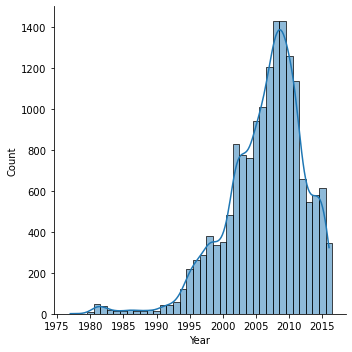

In [28]:
sns.displot(games_df['Year'], kde=True, discrete=True) 

<AxesSubplot:xlabel='Year'>

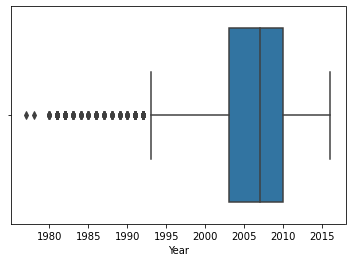

In [29]:
sns.boxplot(x=games_df["Year"]) 

In [30]:
games_df["Year"].skew()

-1.0147905622588844

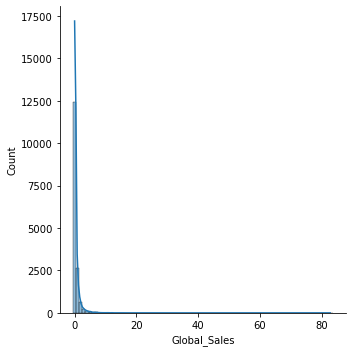

In [31]:
sns.displot(games_df['Global_Sales'], kde=True, discrete=True) 

<AxesSubplot:xlabel='Global_Sales'>

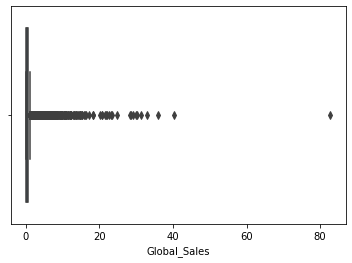

In [32]:
sns.boxplot(x=games_df["Global_Sales"]) 

In [33]:
games_df["Global_Sales"].skew()

17.288035948097253

In [34]:
games_df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64